--- Loading UMAP coordinates ---
Loaded PLOWMAN data: 84 samples
Loaded CULTIVATED1ST data: 319 samples
Loaded WILDSPECIES data: 769 samples

Combined UMAP data shape: (1172, 4)
Unique classes: 8
Unique datasets: 3

--- Generating individual UMAP plots ---
Saving UMAP plot for PLOWMAN to ../figures/plowman_umap_leaf_classes.png
Saving UMAP plot for CULTIVATED1ST to ../figures/cultivated1st_umap_leaf_classes.png
Saving UMAP plot for WILDSPECIES to ../figures/wildspecies_umap_leaf_classes.png

--- Script finished ---


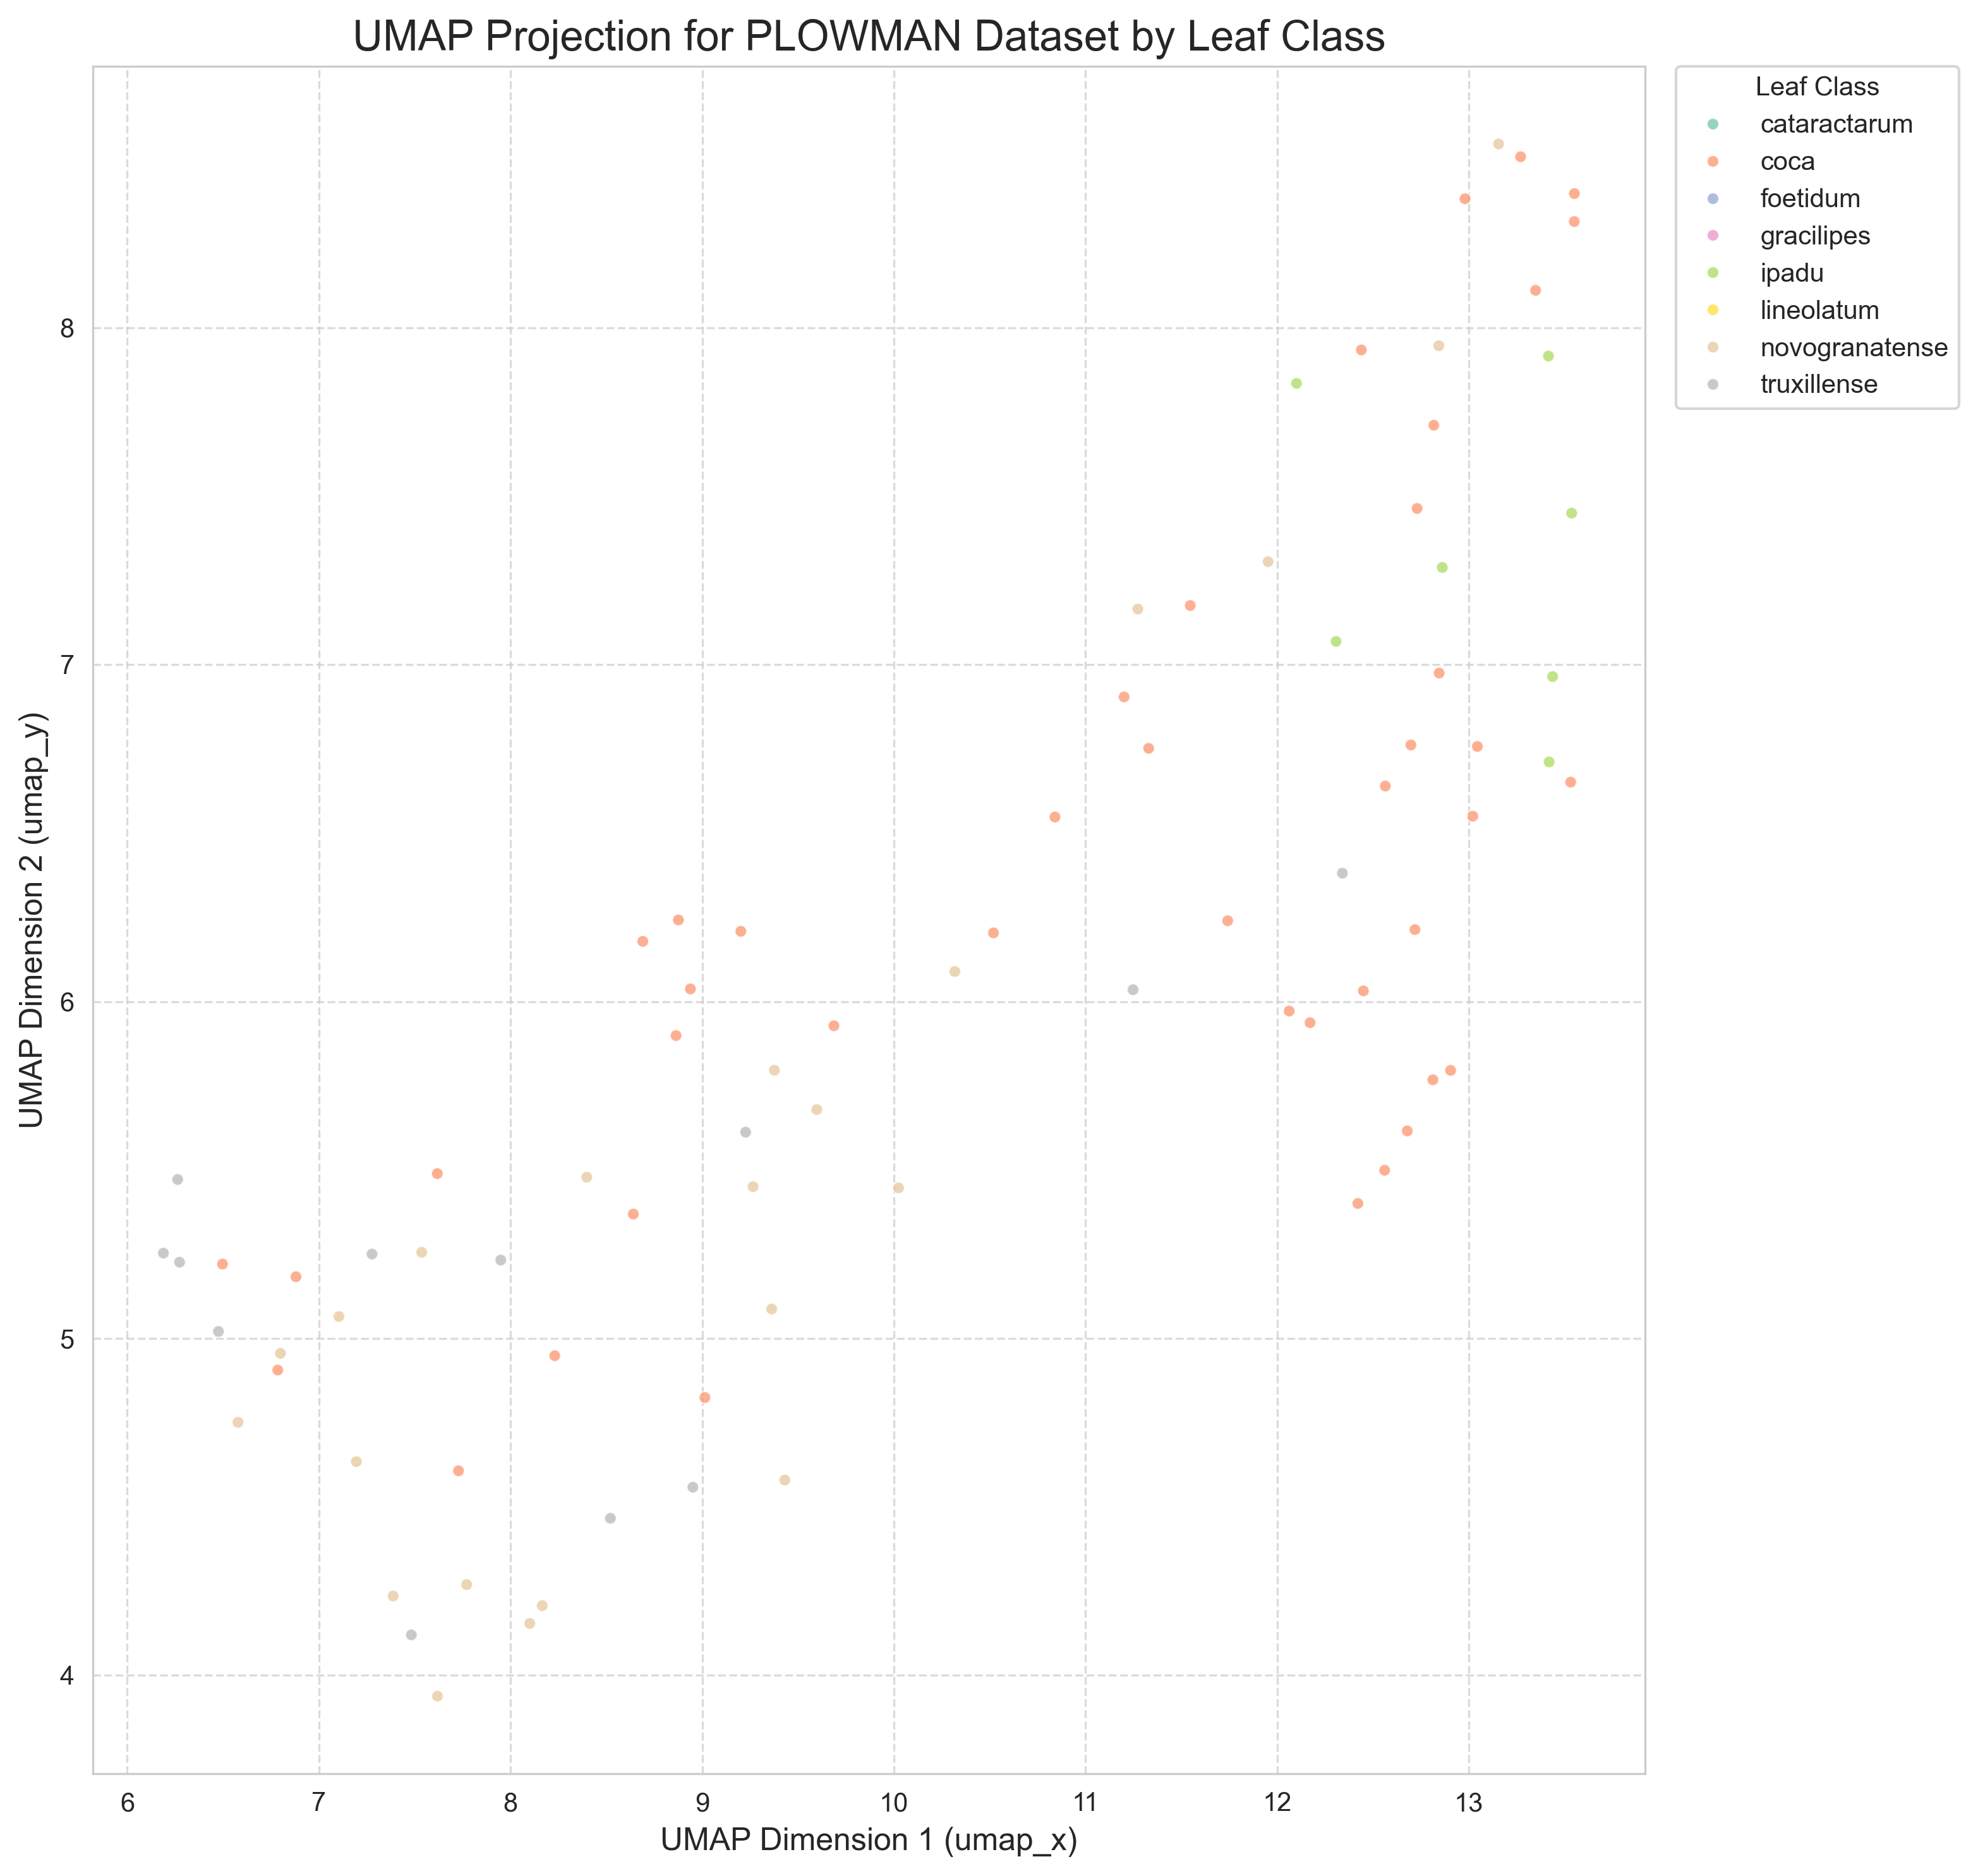

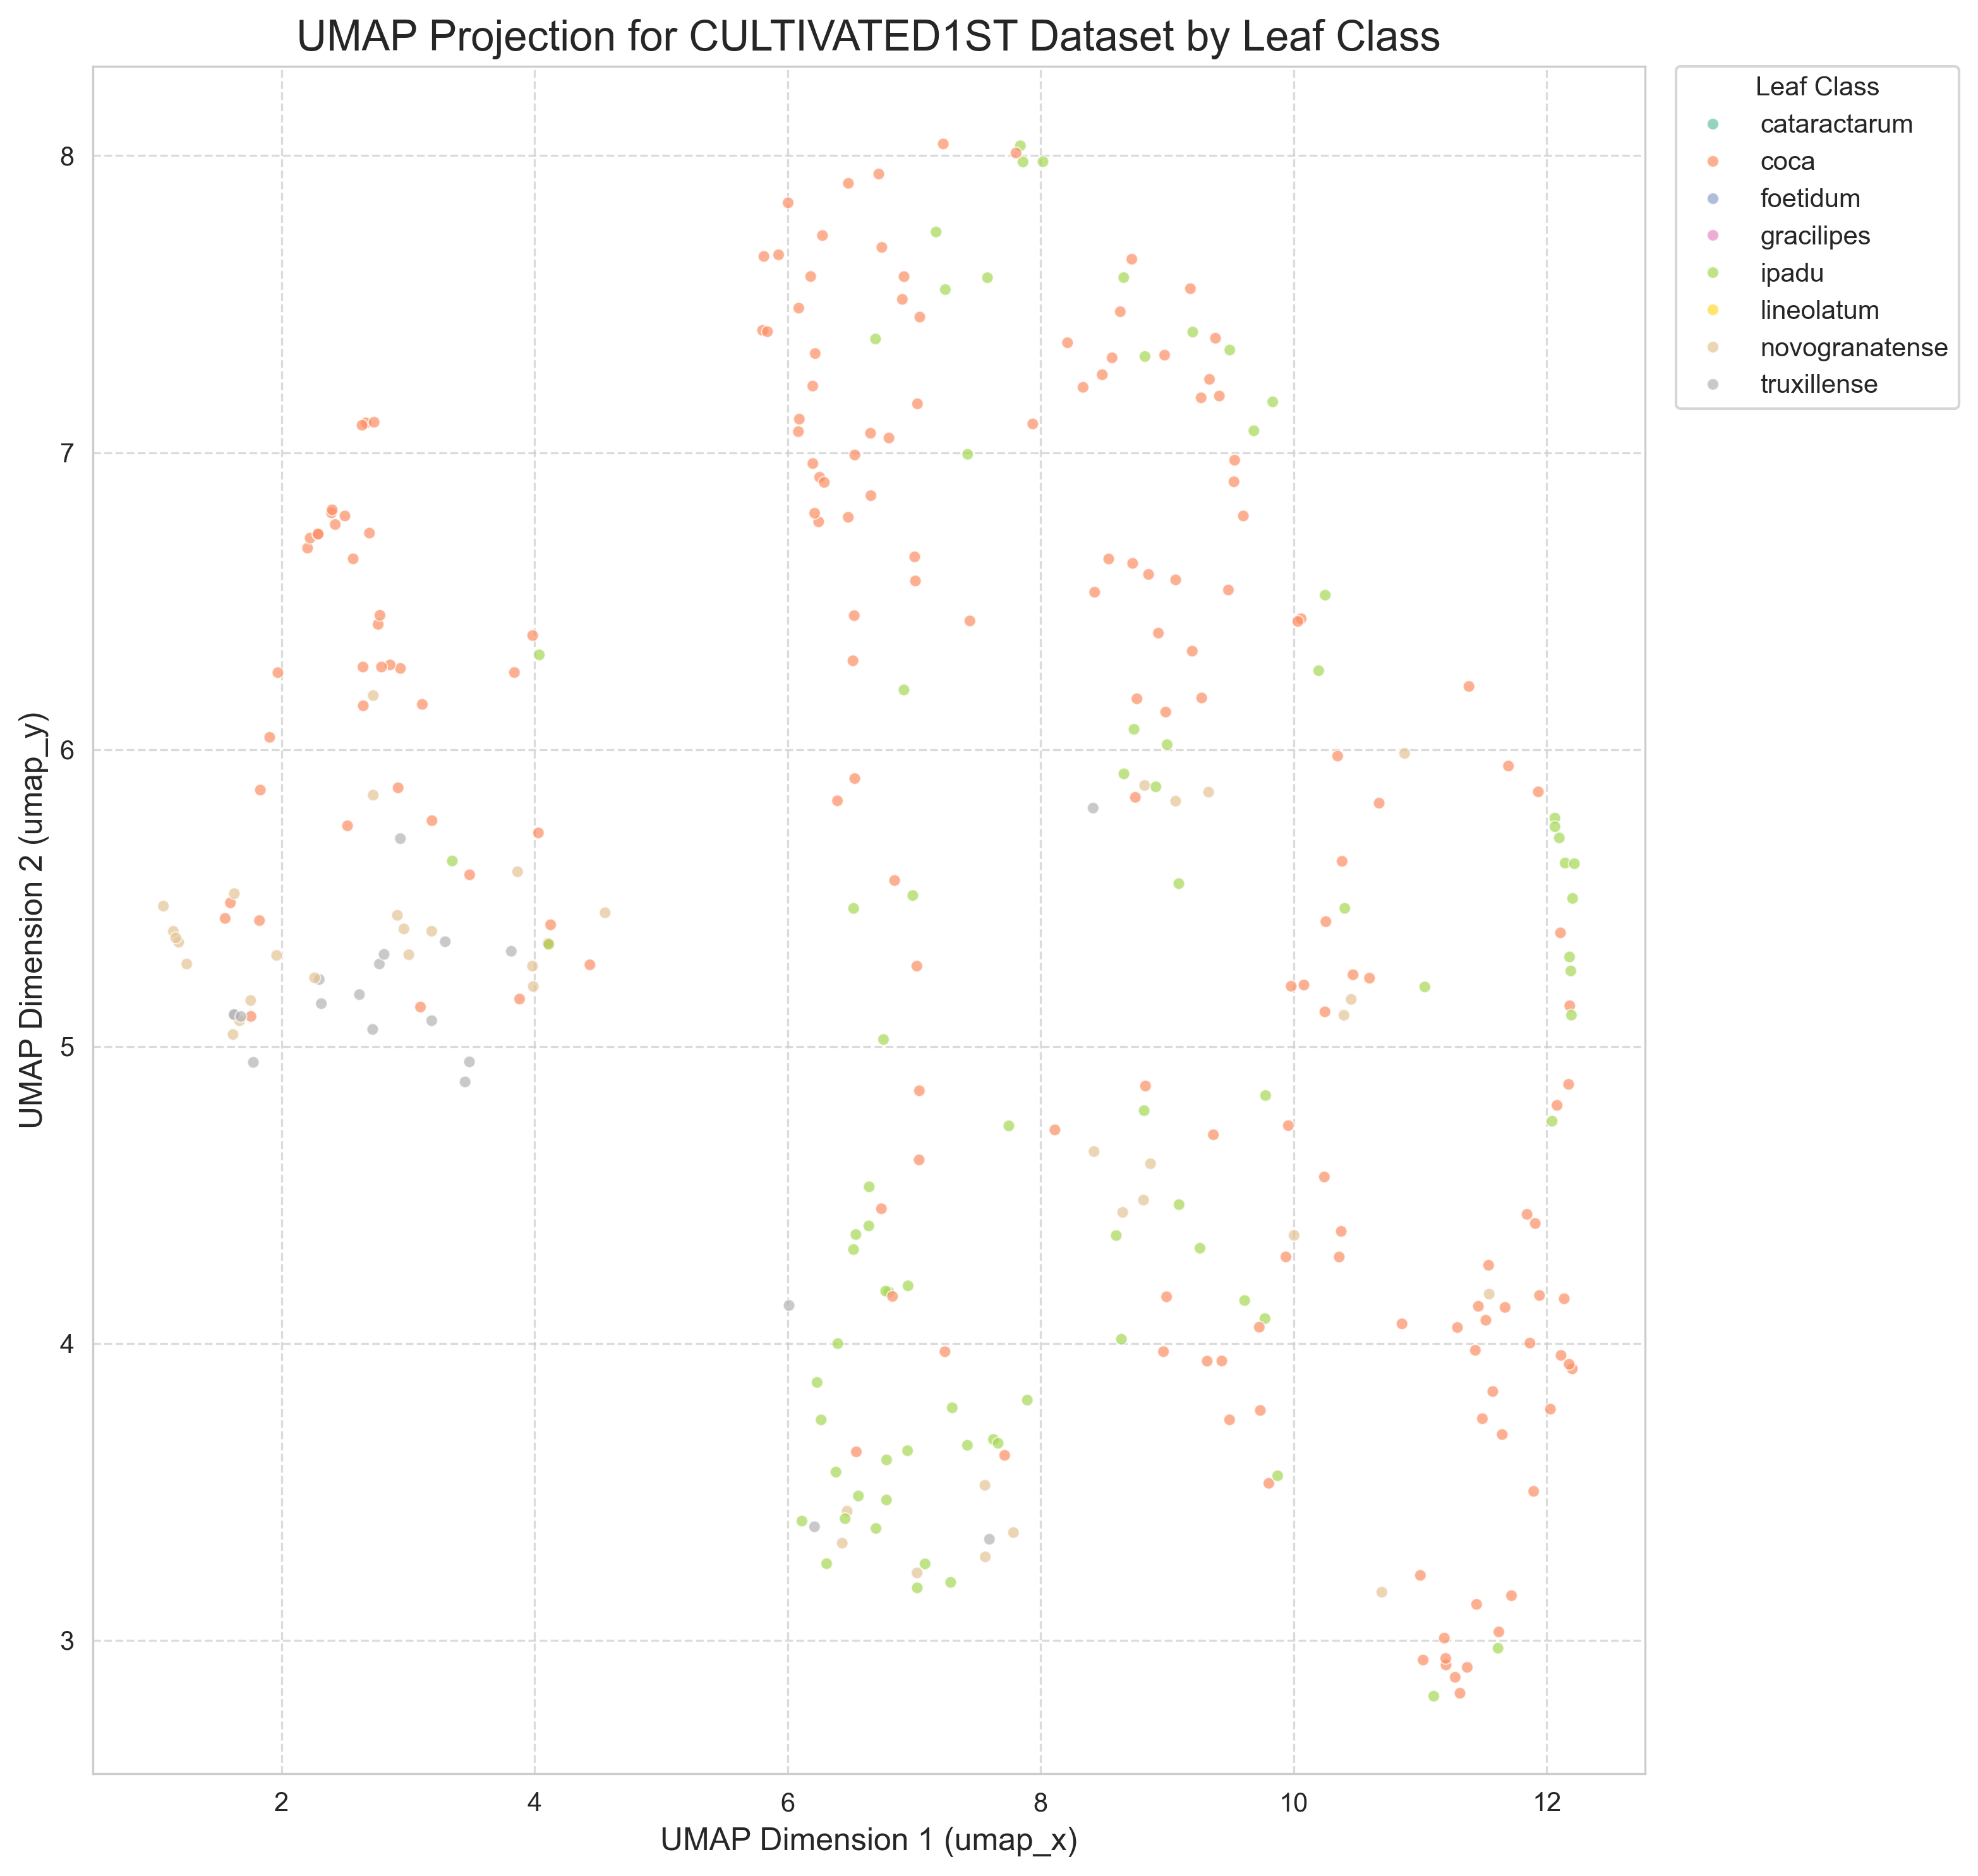

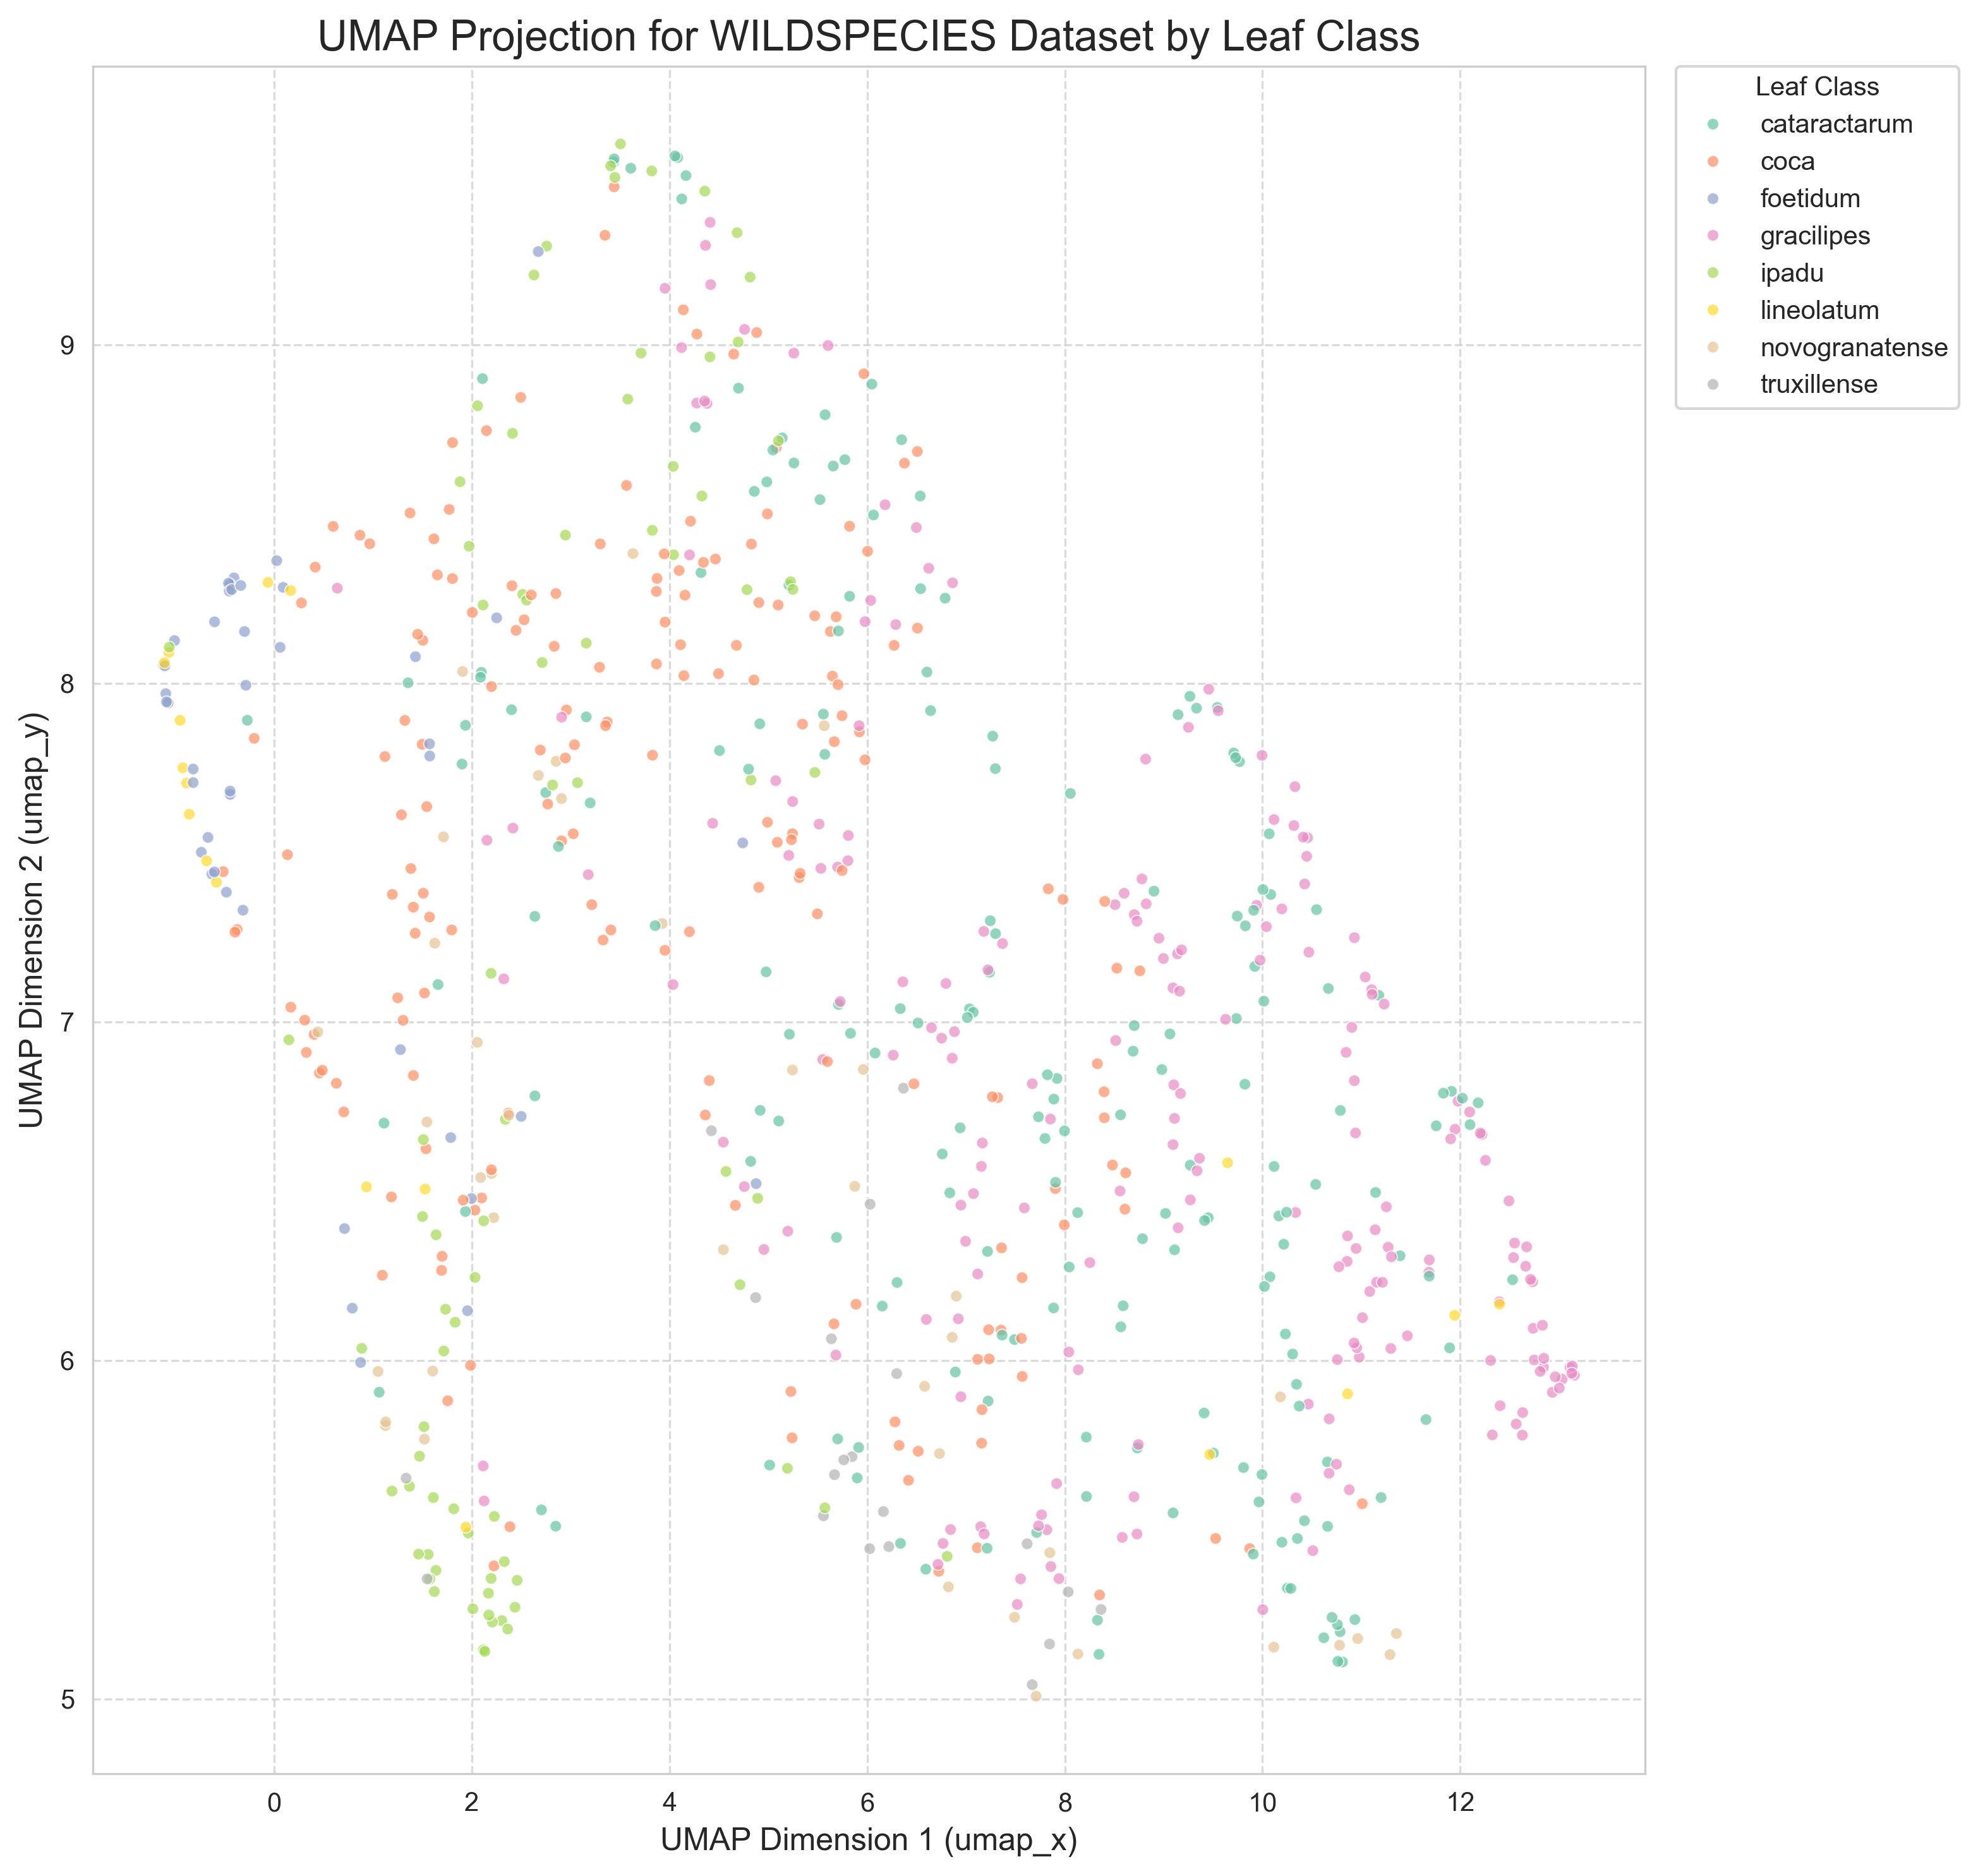

In [4]:
#######################
### LOAD IN MODULES ###
#######################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import sys

#############################
### CONFIGURATION ###
#############################

# Base directory for data and figures, relative to the location of this notebook.
# If this notebook is in 'COCA_PROJECT/notebooks/', then BASE_PROJECT_DIR points to 'COCA_PROJECT/'
BASE_PROJECT_DIR = Path("../")

# Paths to the UMAP coordinate CSV files for each dataset
UMAP_FILENAME = "ECT_Mask_2Channel_CNN_Ensemble_Improved_fold0_umap_embeddings_real_data.csv"

PLOWMAN_UMAP_PATH = BASE_PROJECT_DIR / "data" / "PLOWMAN" / "trained_models" / UMAP_FILENAME
CULTIVATED1ST_UMAP_PATH = BASE_PROJECT_DIR / "data" / "CULTIVATED1ST" / "trained_models" / UMAP_FILENAME
WILDSPECIES_UMAP_PATH = BASE_PROJECT_DIR / "data" / "WILDSPECIES" / "trained_models" / UMAP_FILENAME

# Output directory for the plots, relative to this notebook
OUTPUT_PLOT_DIR = BASE_PROJECT_DIR / "figures"
OUTPUT_PLOT_DIR.mkdir(parents=True, exist_ok=True) # Ensure the figures directory exists

# Plotting parameters
PLOT_DPI = 300
PLOT_FIGSIZE = (12, 10) # Adjusted for individual plots
LEGEND_FONT_SIZE = 10
TITLE_FONT_SIZE = 16

#############################
### DATA LOADING & COMBINATION ###
#############################

all_umap_data = []

print("--- Loading UMAP coordinates ---")

# Load PLOWMAN data
try:
    df_plowman = pd.read_csv(PLOWMAN_UMAP_PATH)
    df_plowman['Dataset'] = 'PLOWMAN'
    all_umap_data.append(df_plowman)
    print(f"Loaded PLOWMAN data: {df_plowman.shape[0]} samples")
except FileNotFoundError:
    print(f"Warning: PLOWMAN UMAP file not found at {PLOWMAN_UMAP_PATH}. Skipping.")

# Load CULTIVATED1ST data
try:
    df_cultivated1st = pd.read_csv(CULTIVATED1ST_UMAP_PATH)
    df_cultivated1st['Dataset'] = 'CULTIVATED1ST'
    all_umap_data.append(df_cultivated1st)
    print(f"Loaded CULTIVATED1ST data: {df_cultivated1st.shape[0]} samples")
except FileNotFoundError:
    print(f"Warning: CULTIVATED1ST UMAP file not found at {CULTIVATED1ST_UMAP_PATH}. Skipping.")

# Load WILDSPECIES data
try:
    df_wildspecies = pd.read_csv(WILDSPECIES_UMAP_PATH)
    df_wildspecies['Dataset'] = 'WILDSPECIES'
    all_umap_data.append(df_wildspecies)
    print(f"Loaded WILDSPECIES data: {df_wildspecies.shape[0]} samples")
except FileNotFoundError:
    print(f"Warning: WILDSPECIES UMAP file not found at {WILDSPECIES_UMAP_PATH}. Skipping.")

if not all_umap_data:
    print("Error: No UMAP data files were loaded. Please check paths and ensure scripts ran successfully.")
    sys.exit(1)

# Concatenate all dataframes for consistent class category order and palette generation
combined_df = pd.concat(all_umap_data, ignore_index=True)
# Ensure 'class_label' is treated as a category, and get all unique categories (classes)
combined_df['class_label'] = combined_df['class_label'].astype('category')
all_unique_classes = combined_df['class_label'].cat.categories.tolist()


print(f"\nCombined UMAP data shape: {combined_df.shape}")
print(f"Unique classes: {len(all_unique_classes)}") # Use length of all_unique_classes
print(f"Unique datasets: {combined_df['Dataset'].nunique()}")

# Create a consistent colormap for all plots based on all unique classes using 'Set2'
# 'Set2' is a qualitative palette with 8 distinct colors.
# If you have more than 8 classes, you might need to use 'hls' or manually define.
palette = sns.color_palette("Set2", n_colors=len(all_unique_classes)) # Ensure enough colors for all classes

# Create a mapping from class label to a specific color
class_color_map = dict(zip(all_unique_classes, palette))


#############################
### PLOTTING INDIVIDUAL DATASETS ###
#############################

print("\n--- Generating individual UMAP plots ---")

# Define the order for plotting
datasets_to_plot = ['PLOWMAN', 'CULTIVATED1ST', 'WILDSPECIES']

for dataset_name in datasets_to_plot:
    df_subset = combined_df[combined_df['Dataset'] == dataset_name]

    if df_subset.empty:
        print(f"No data for {dataset_name}. Skipping plot.")
        continue

    plt.figure(figsize=PLOT_FIGSIZE, dpi=PLOT_DPI)
    sns.set_style("whitegrid")

    # Pass the full class_color_map directly to palette.
    # Seaborn will automatically pick colors for the classes present in df_subset.
    sns.scatterplot(
        x='umap_x',
        y='umap_y',
        hue='class_label', # Color by class label
        palette=class_color_map, # Use the comprehensive color map
        data=df_subset,
        s=20,
        alpha=0.7,
        edgecolor='w',
        linewidth=0.5
    )

    plt.title(f'UMAP Projection for {dataset_name} Dataset by Leaf Class', fontsize=TITLE_FONT_SIZE)
    plt.xlabel('UMAP Dimension 1 (umap_x)', fontsize=12)
    plt.ylabel('UMAP Dimension 2 (umap_y)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Place legend outside to avoid overlap
    plt.legend(title="Leaf Class", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0., fontsize=LEGEND_FONT_SIZE)
    plt.tight_layout(rect=[0, 0, 0.88, 1]) # Adjust layout to make space for legend

    output_filename = OUTPUT_PLOT_DIR / f"{dataset_name.lower()}_umap_leaf_classes.png"
    print(f"Saving UMAP plot for {dataset_name} to {output_filename}")
    plt.savefig(output_filename, dpi=PLOT_DPI)
    # plt.show() # Uncomment if you want to see each plot immediately in the notebook

print("\n--- Script finished ---")